# АНАТОМИЯ СОЛИДАРНОСТИ
#### Какие политические группы образуются в процессе голосований ООН и как они связаны между собой.

In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# 1. Основание

theory...
Акцент на "Профиле голосования", "Коэффициент солидарности" и т.д.

# 2. Сбор данных

In [ ]:
-- Принципы сбора (какие данные)

# 3. Анализ

In [12]:
#pd.read_csv('resolution_vote/' + 'A/RES/ES-11/1'.replace('/', '_') + '.csv')

In [9]:
G = nx.read_gexf('UN_UKRAINE--POLITICAL_CONDITIONS_attr_4.gexf')
len(G)

193

## 3.1 Группы абсолютной солидарности
### Коэффициент солидарности 1

Возможно, что написание текста отчета и иллюстрации вполне может происходить в этом редакторе. Можно ли сделать шрифт крупнее?

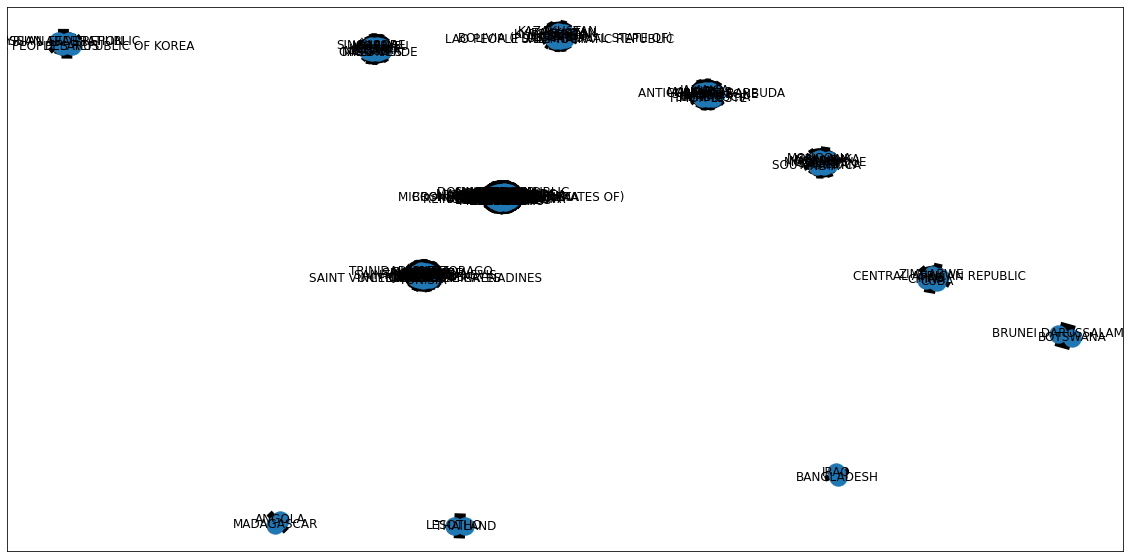

In [10]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 5
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])

# Для убирания отдельных нод
F5 = nx.Graph() 
F5.add_edges_from(F.edges(data = True))

pos = nx.spring_layout(F5, seed=0)

for edge in F5.edges(data='weight'):
    nx.draw_networkx_edges(F5, pos, edgelist=[edge], width=edge[2] * edge[2])
       
nx.draw_networkx(F5, pos) 

In [11]:
print(len(sorted(nx.connected_components(F5))))
print(len(F5.nodes()))

12
155


#### Профиль солидарности

Профиль солидарности -- характер голосований по каждой резолюции в выбранной теме. Например, в случае с украинским вопросом -- это 5 голосований, 5 резолюций. 31+31+1 = 63 варианта голосований. 63 аозможных профиля.

Выделяется 12 групп с одинаковым профилем солидарности, которые в сумме включают в сябя 155 стран. Остальные 193-155=38 стран имеют собственный профиль голосований

In [12]:
country_name = 'IRAN (ISLAMIC REPUBLIC OF)'
country_name = 'HUNGARY'

for index in range (0, len(list(nx.connected_components(F5)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(F5))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(F5))[index]
    print(country_arr_test)
    print('______________')


0
True

{'REPUBLIC OF MOLDOVA', 'HUNGARY', 'CROATIA', 'LUXEMBOURG', 'ROMANIA', 'CZECHIA', 'GUATEMALA', 'LIECHTENSTEIN', 'LIBERIA', 'NORTH MACEDONIA', 'SLOVAKIA', 'REPUBLIC OF KOREA', 'JAPAN', 'COLOMBIA', 'MICRONESIA (FEDERATED STATES OF)', 'SEYCHELLES', 'LITHUANIA', 'PANAMA', 'FRANCE', 'MALAWI', 'SAMOA', 'BELGIUM', 'GREECE', "CÔTE D'IVOIRE", 'TUVALU', 'FINLAND', 'ALBANIA', 'PERU', 'COSTA RICA', 'DENMARK', 'AUSTRALIA', 'LATVIA', 'ANDORRA', 'SPAIN', 'PAPUA NEW GUINEA', 'SLOVENIA', 'UNITED KINGDOM', 'BULGARIA', 'NORWAY', 'SAN MARINO', 'MONACO', 'GEORGIA', 'NETHERLANDS', 'PARAGUAY', 'KIRIBATI', 'MALTA', 'URUGUAY', 'POLAND', 'IRELAND', 'SWITZERLAND', 'MONTENEGRO', 'ESTONIA', 'MARSHALL ISLANDS', 'UNITED STATES', 'AUSTRIA', 'DOMINICAN REPUBLIC', 'CANADA', 'ICELAND', 'NEW ZEALAND', 'GERMANY', 'NAURU', 'MYANMAR', 'ARGENTINA', 'CYPRUS', 'PHILIPPINES', 'ITALY', 'UKRAINE', 'BOSNIA AND HERZEGOVINA', 'SWEDEN', 'FIJI', 'PALAU', 'TÜRKIYE', 'CHILE', 'PORTUGAL', 'CHAD', 'ECUADOR'}
______________

1
Fal

In [92]:
country_attr_table_3 = pd.read_csv('country_attr_table_3.csv')
#country_attr_table_3.drop(columns = {'Unnamed: 0', 'Unnamed: 0.1'}, inplace = True)
country_attr_table_3

,Country,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020"
0,AFGHANISTAN,AF,33.939110,67.709953,41.13,82.0,19793
1,ALBANIA,AL,41.153332,20.168331,2.84,71.0,14910
2,ALGERIA,DZ,28.033886,1.659626,44.90,5954.0,147689
3,ANDORRA,AD,42.546245,1.601554,0.08,1.0,2864
4,ANGOLA,AO,-11.202692,17.873887,35.59,3639.0,62307
...,...,...,...,...,...,...,...
188,VENEZUELA (BOLIVARIAN REPUBLIC OF),VE,6.423750,-66.589730,28.30,3238.0,106359
189,VIET NAM,VN,14.058324,108.277199,98.19,2776.0,271158
190,YEMEN,YE,15.552727,48.516388,33.70,113.0,27958
191,ZAMBIA,ZM,-13.133897,27.849332,20.02,391.0,18111


In [93]:
country_attr_table_3[country_attr_table_3['Primary energy production (petajoules), 2019'].isna()]

,Country,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020"
112,MONACO,MC,43.750298,7.412841,0.04,NaN,6816
148,SAN MARINO,SM,43.942360,12.457777,0.03,NaN,1555


In [199]:
vote_table = pd.read_csv('UKRAINE--POLITICAL CONDITIONS_vote_table.csv')
vote_table
#vote_table[vote_table['Country'] == 'BAHAMAS']

,Country,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
0,AFGHANISTAN,1.0,1.0,NaN,1.0,1.0
1,ALBANIA,1.0,1.0,1.0,1.0,1.0
2,ALGERIA,0.0,0.0,-1.0,0.0,0.0
3,ANDORRA,1.0,1.0,1.0,1.0,1.0
4,ANGOLA,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
188,VENEZUELA (BOLIVARIAN REPUBLIC OF),NaN,NaN,NaN,NaN,NaN
189,VIET NAM,0.0,0.0,-1.0,0.0,0.0
190,YEMEN,0.0,1.0,0.0,1.0,1.0
191,ZAMBIA,1.0,1.0,NaN,1.0,1.0


In [194]:
len(
    vote_table[
        vote_table['A/RES/ES-11/5'].isna()
        |
        vote_table['A/RES/ES-11/4'].isna()
        |
        vote_table['A/RES/ES-11/3'].isna()
        |
        vote_table['A/RES/ES-11/2'].isna()
        |
        vote_table['A/RES/ES-11/1'].isna()
    ]
)

32

In [159]:
len(
    vote_table[
        vote_table['A/RES/ES-11/5'].isna()
        &
        vote_table['A/RES/ES-11/4'].isna()
        &
        vote_table['A/RES/ES-11/3'].isna()
        &
        vote_table['A/RES/ES-11/2'].isna()
        &
        vote_table['A/RES/ES-11/1'].isna()
    ]
)

4

###  3.2.1 Группы полной солидарности

In [96]:
group_index = 4
range_index_name = [
    'Population mid-year estimates (millions), 2022',
    'Primary energy production (petajoules), 2019',
    'GDP in current prices (millions of US dollars), 2020'
]
solidarity_group_prefix = 'USG'

In [97]:
country_attr_table_3[
    [x in list(nx.connected_components(F5))[group_index] for x in country_attr_table_3['Country']]
]

,Country,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020"
12,BAHRAIN,BH,25.930414,50.637772,1.47,1045.0,33904
14,BARBADOS,BB,13.193887,-59.543198,0.28,3.0,4440
17,BELIZE,BZ,17.189877,-88.497650,0.41,7.0,1586
19,BHUTAN,BT,27.514162,90.433601,0.78,85.0,2483
23,BRAZIL,BR,-14.235004,-51.925280,215.31,12975.0,1444733
29,CAMBODIA,KH,12.565679,104.990963,16.77,162.0,25291
52,EGYPT,EG,26.820553,30.802498,110.99,3982.0,369309
63,GAMBIA,GM,13.443182,-15.310139,2.71,7.0,1830
72,GUYANA,GY,4.860416,-58.930180,0.81,4.0,5471
78,INDONESIA,ID,-0.789275,113.921327,275.50,21267.0,1058424


In [98]:
def main_sg_report(group_index):
    
    def max_value(table, column_name):
            return table[
                table[column_name] == table[column_name].max()
            ]
    
    
    for index in range (0, len(country_attr_table_3)):
        if (country_attr_table_3['Country'][index] in list(nx.connected_components(F5))[group_index]): 
            
                country_attr_table_3.loc[index, ('solidarity_group_1')] = solidarity_group_prefix + '_' + ''.join([str(int(x)) for x in list(
                            vote_table[
                                [x in list(nx.connected_components(F5))[group_index] for x in vote_table['Country']]
                            ].iloc[0][1:]
                            )
                    ]) 
                
                country_attr_table_3.loc[index, ('votes profile')] = ''.join([str(int(x)) for x in list(
                            vote_table[
                                [x in list(nx.connected_components(F5))[group_index] for x in vote_table['Country']]
                            ].iloc[0][1:]
                            ) 
                   ]) 
                                                                              
                country_attr_table_3.loc[index, ('main country (by population)')] = max_value(
                            country_attr_table_3[
                                [x in list(nx.connected_components(F5))[group_index] for x in country_attr_table_3['Country']]
                            ],
                            range_index_name[0]).iloc[0]['Country']
                
                country_attr_table_3.loc[index, ('main country (by energy)')] = max_value(
                            country_attr_table_3[
                                [x in list(nx.connected_components(F5))[group_index] for x in country_attr_table_3['Country']]
                            ],
                            range_index_name[1]).iloc[0]['Country']
                
                country_attr_table_3.loc[index, ('main country (by GDP)')] = max_value(
                            country_attr_table_3[
                                [x in list(nx.connected_components(F5))[group_index] for x in country_attr_table_3['Country']]
                            ],
                            range_index_name[2]).iloc[0]['Country']
                                                                              
                country_attr_table_3.loc[index, ('number of members')] = len(list(nx.connected_components(F5))[group_index])

In [99]:
#main_sg_report(group_index)

for group_index in range(0, len(list(nx.connected_components(F5)))):
    main_sg_report(group_index)
    print(group_index) 

0
1
2
3
4
5
6
7
8
9
10
11


In [38]:
# country_attr_table_3.rename(columns = {'solidarity_group': 'solidarity_group_1'}, inplace = True)

In [100]:
country_attr_table_3

,Country,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
0,AFGHANISTAN,AF,33.939110,67.709953,41.13,82.0,19793,NaN,NaN,NaN,NaN,NaN,NaN
1,ALBANIA,AL,41.153332,20.168331,2.84,71.0,14910,USG_11111,11111,UNITED STATES,UNITED STATES,UNITED STATES,76.0
2,ALGERIA,DZ,28.033886,1.659626,44.90,5954.0,147689,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
3,ANDORRA,AD,42.546245,1.601554,0.08,1.0,2864,USG_11111,11111,UNITED STATES,UNITED STATES,UNITED STATES,76.0
4,ANGOLA,AO,-11.202692,17.873887,35.59,3639.0,62307,USG_01000,01000,ANGOLA,ANGOLA,ANGOLA,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,VENEZUELA (BOLIVARIAN REPUBLIC OF),VE,6.423750,-66.589730,28.30,3238.0,106359,NaN,NaN,NaN,NaN,NaN,NaN
189,VIET NAM,VN,14.058324,108.277199,98.19,2776.0,271158,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
190,YEMEN,YE,15.552727,48.516388,33.70,113.0,27958,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0
191,ZAMBIA,ZM,-13.133897,27.849332,20.02,391.0,18111,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
#country_attr_table_3.drop(columns = {'Unnamed: 0'}, inplace = True)
country_attr_table_3.to_csv('country_attr_table_USG.csv')

In [111]:
country_attr_table_USG = pd.read_csv('country_attr_table_USG.csv', index_col = 'Country')
country_attr_table_USG.drop(columns = {'Unnamed: 0'}, inplace = True)
country_attr_table_USG

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
AFGHANISTAN,AF,33.939110,67.709953,41.13,82.0,19793,NaN,NaN,NaN,NaN,NaN,NaN
ALBANIA,AL,41.153332,20.168331,2.84,71.0,14910,USG_11111,11111,UNITED STATES,UNITED STATES,UNITED STATES,76.0
ALGERIA,DZ,28.033886,1.659626,44.90,5954.0,147689,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
ANDORRA,AD,42.546245,1.601554,0.08,1.0,2864,USG_11111,11111,UNITED STATES,UNITED STATES,UNITED STATES,76.0
ANGOLA,AO,-11.202692,17.873887,35.59,3639.0,62307,USG_01000,01000,ANGOLA,ANGOLA,ANGOLA,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
VENEZUELA (BOLIVARIAN REPUBLIC OF),VE,6.423750,-66.589730,28.30,3238.0,106359,NaN,NaN,NaN,NaN,NaN,NaN
VIET NAM,VN,14.058324,108.277199,98.19,2776.0,271158,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
YEMEN,YE,15.552727,48.516388,33.70,113.0,27958,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0


### Обзор групп

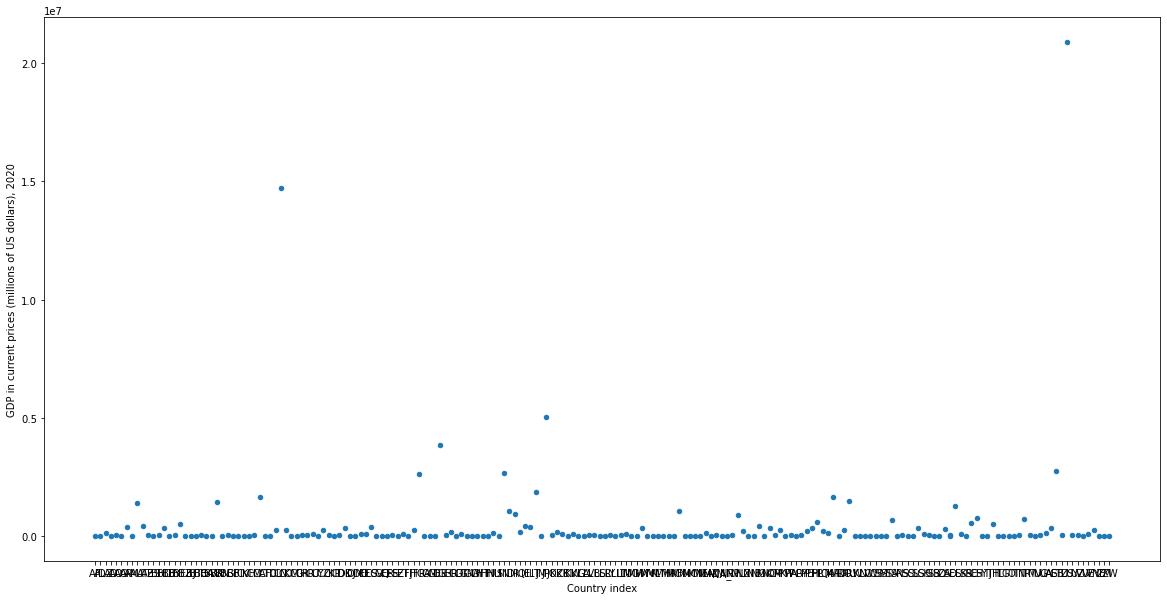

In [112]:
#plt.figure(figsize=(20,10))

country_attr_table_USG.plot(
    'Country index',
    'GDP in current prices (millions of US dollars), 2020', 
    kind = 'scatter',
    figsize=(20,10)
);

{'whiskers': [<matplotlib.lines.Line2D at 0x1291656a0>,
 'caps': [<matplotlib.lines.Line2D at 0x129165d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x129165340>],
 'medians': [<matplotlib.lines.Line2D at 0x129184460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1291847c0>],
 'means': []}

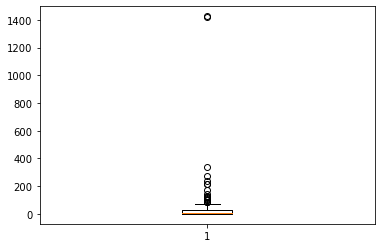

In [114]:
plt.boxplot(country_attr_table_USG['Population mid-year estimates (millions), 2022'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1291905b0>,
 'caps': [<matplotlib.lines.Line2D at 0x129190c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x129190250>],
 'medians': [<matplotlib.lines.Line2D at 0x12751a370>],
 'fliers': [<matplotlib.lines.Line2D at 0x12751a6d0>],
 'means': []}

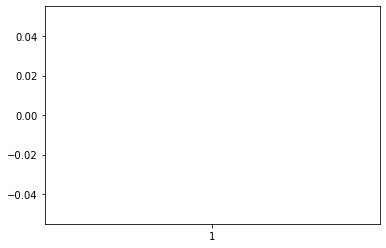

In [115]:
plt.boxplot(country_attr_table_USG['Primary energy production (petajoules), 2019'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1275156d0>,
 'caps': [<matplotlib.lines.Line2D at 0x127515eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1275153a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1291122b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x129112610>],
 'means': []}

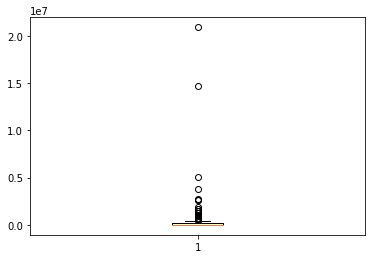

In [116]:
plt.boxplot(country_attr_table_USG['GDP in current prices (millions of US dollars), 2020'])

(array([137.,  26.,  10.,   4.,   4.,   3.,   1.,   1.,   0.,   3.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.]),
 array([1.00000000e-02, 2.37746667e+01, 4.75393333e+01, 7.13040000e+01,
        9.50686667e+01, 1.18833333e+02, 1.42598000e+02, 1.66362667e+02,
        1.90127333e+02, 2.13892000e+02, 2.37656667e+02, 2.61421333e+02,
        2.85186000e+02, 3.08950667e+02, 3.32715333e+02, 3.56480000e+02,
        3.80244667e+02, 4.04009333e+02, 4.27774000e+02, 4.51538667e+02,
        4.75303333e+02, 4.99068000e+02, 5.22832667e+02, 5.46597333e+02,
        5.70362000e+02, 5.94126667e+02, 6.17891333e+02, 6.41656000e+02,
        6.65420667e+02, 6.89185333e+02, 7.12950000e+02, 7.36714667e+02,
        7.6047

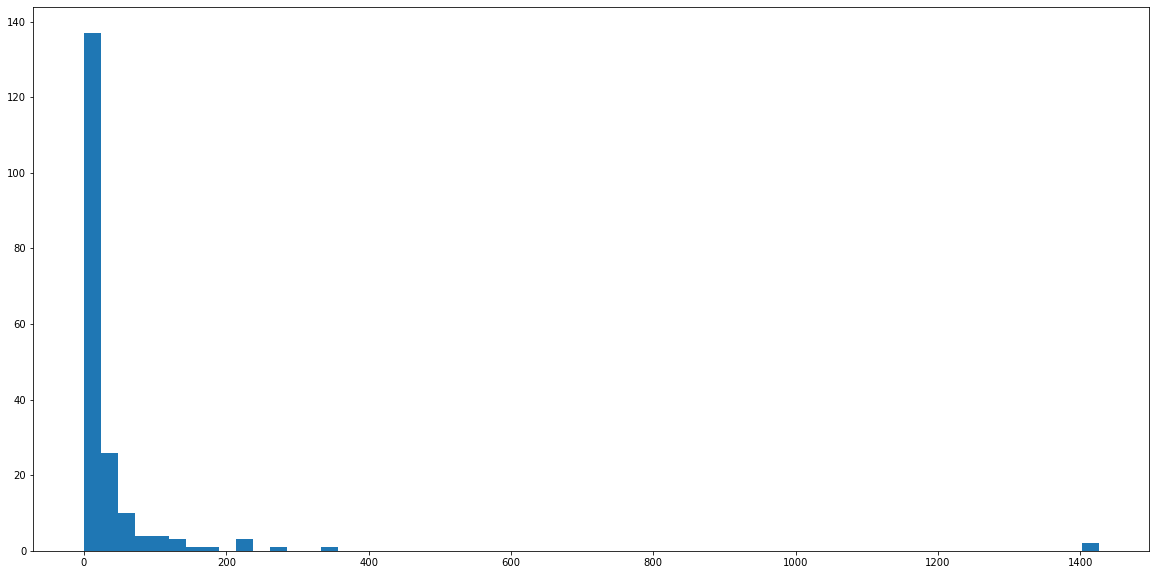

In [117]:
plt.figure(figsize=(20,10))


plt.hist(
    country_attr_table_USG['Population mid-year estimates (millions), 2022'],
    bins = 60
)




(array([158.,  14.,   5.,   3.,   5.,   1.,   0.,   3.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.]),
 array([5.50000000e+01, 3.48283183e+05, 6.96511367e+05, 1.04473955e+06,
        1.39296773e+06, 1.74119592e+06, 2.08942410e+06, 2.43765228e+06,
        2.78588047e+06, 3.13410865e+06, 3.48233683e+06, 3.83056502e+06,
        4.17879320e+06, 4.52702138e+06, 4.87524957e+06, 5.22347775e+06,
        5.57170593e+06, 5.91993412e+06, 6.26816230e+06, 6.61639048e+06,
        6.96461867e+06, 7.31284685e+06, 7.66107503e+06, 8.00930322e+06,
        8.35753140e+06, 8.70575958e+06, 9.05398777e+06, 9.40221595e+06,
        9.75044413e+06, 1.00986723e+07, 1.04469005e+07, 1.07951287e+07,
        1.1143

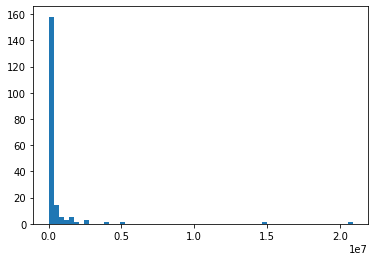

In [118]:
plt.hist(country_attr_table_USG['GDP in current prices (millions of US dollars), 2020'], bins = 60)

(array([149.,  16.,   5.,   6.,   1.,   4.,   0.,   1.,   1.,   0.,   1.,
          1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.]),
 array([     0.        ,   1829.08333333,   3658.16666667,   5487.25      ,
          7316.33333333,   9145.41666667,  10974.5       ,  12803.58333333,
         14632.66666667,  16461.75      ,  18290.83333333,  20119.91666667,
         21949.        ,  23778.08333333,  25607.16666667,  27436.25      ,
         29265.33333333,  31094.41666667,  32923.5       ,  34752.58333333,
         36581.66666667,  38410.75      ,  40239.83333333,  42068.91666667,
         43898.        ,  45727.08333333,  47556.16666667,  49385.25      ,
         51214.33333333,  53043.41666667,  54872.5       ,

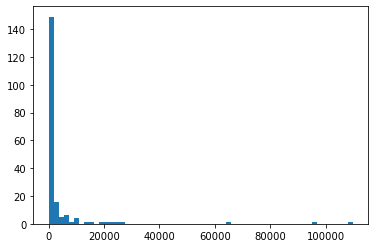

In [119]:
plt.hist(country_attr_table_USG['Primary energy production (petajoules), 2019'], bins = 60)

In [120]:
list(set(country_attr_table_USG['solidarity_group_1']))

[nan,
 'USG_11111',
 'USG_01000',
 'USG_01010',
 'USG_11011',
 'USG_-1-1-1-1-1',
 'USG_01001',
 'USG_00-100',
 'USG_01011',
 'USG_00000',
 'USG_00011',
 'USG_01111',
 'USG_-10-100']

In [121]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[1]
]

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
ALBANIA,AL,41.153332,20.168331,2.84,71.0,14910,USG_11111,11111,UNITED STATES,UNITED STATES,UNITED STATES,76.0
ANDORRA,AD,42.546245,1.601554,0.08,1.0,2864,USG_11111,11111,UNITED STATES,UNITED STATES,UNITED STATES,76.0
ARGENTINA,AR,-38.416097,-63.616672,45.51,3292.0,383067,USG_11111,11111,UNITED STATES,UNITED STATES,UNITED STATES,76.0
AUSTRALIA,AU,-25.274398,133.775136,26.18,18623.0,1423473,USG_11111,11111,UNITED STATES,UNITED STATES,UNITED STATES,76.0
AUSTRIA,AT,47.516231,14.550072,8.94,498.0,433258,USG_11111,11111,UNITED STATES,UNITED STATES,UNITED STATES,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...
TUVALU,TV,-7.109535,177.649330,0.01,0.0,55,USG_11111,11111,UNITED STATES,UNITED STATES,UNITED STATES,76.0
UKRAINE,UA,48.379433,31.165580,39.70,2503.0,155582,USG_11111,11111,UNITED STATES,UNITED STATES,UNITED STATES,76.0
UNITED KINGDOM,GB,55.378051,-3.435973,67.51,5087.0,2764198,USG_11111,11111,UNITED STATES,UNITED STATES,UNITED STATES,76.0


(array([37., 12.,  1.,  7.,  2.,  0.,  2.,  2.,  2.,  3.,  1.,  2.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.00000e-02, 5.64800e+00, 1.12860e+01, 1.69240e+01, 2.25620e+01,
        2.82000e+01, 3.38380e+01, 3.94760e+01, 4.51140e+01, 5.07520e+01,
        5.63900e+01, 6.20280e+01, 6.76660e+01, 7.33040e+01, 7.89420e+01,
        8.45800e+01, 9.02180e+01, 9.58560e+01, 1.01494e+02, 1.07132e+02,
        1.12770e+02, 1.18408e+02, 1.24046e+02, 1.29684e+02, 1.35322e+02,
        1.40960e+02, 1.46598e+02, 1.52236e+02, 1.57874e+02, 1.63512e+02,
        1.69150e+02, 1.74788e+02, 1.80426e+02, 1.86064e+02, 1.91702e+02,
        1.97340e+02, 2.02978e+02, 2.08616e+02, 2.14254e+02, 2.19892e+02,
        2.25530e+02, 2.31168e+02, 2.36806e+02, 2.42444e+02, 2.48082e+02,
 

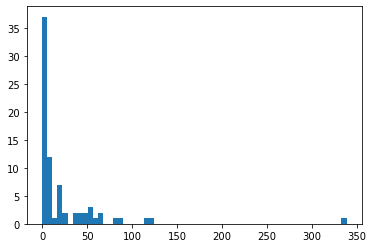

In [122]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[1]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [123]:
country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[1]
    ].describe()

,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",number of members
count,76.000000,76.000000,76.000000,74.000000,7.600000e+01,76.0
mean,27.588876,17.037525,22.700263,2742.527027,6.993939e+05,76.0
std,28.197696,75.451207,45.361209,11610.061200,2.506811e+06,0.0
min,-40.900557,-172.104629,0.010000,0.000000,5.500000e+01,76.0
25%,7.352034,-6.216423,1.720000,47.250000,1.424850e+04,76.0
50%,40.808499,15.097732,6.330000,322.000000,7.181850e+04,76.0
75%,47.732031,29.068809,21.852500,1279.250000,3.676582e+05,76.0
max,64.963051,179.414413,338.290000,96539.000000,2.089375e+07,76.0


(array([59., 12.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.00000e-02, 3.38380e+01, 6.76660e+01, 1.01494e+02, 1.35322e+02,
        1.69150e+02, 2.02978e+02, 2.36806e+02, 2.70634e+02, 3.04462e+02,
        3.38290e+02]),
 <BarContainer object of 10 artists>)

<Figure size 720x43200 with 0 Axes>

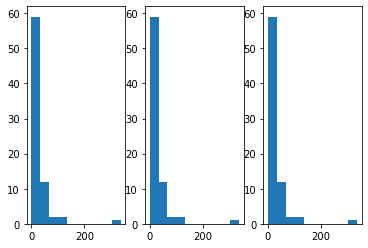

In [124]:
plt.figure(figsize=(10, 600))

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharex=True)
axs = [ax1,ax2,ax3]

axs[0].hist(
    country_attr_table_USG[
                country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[1]
            ]['Population mid-year estimates (millions), 2022']
)

axs[1].hist(
    country_attr_table_USG[
                country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[1]
            ]['Population mid-year estimates (millions), 2022']
)

axs[2].hist(
    country_attr_table_USG[
                country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[1]
            ]['Population mid-year estimates (millions), 2022']
)

In [125]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[2]
]

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
ANGOLA,AO,-11.202692,17.873887,35.59,3639.0,62307,USG_01000,01000,ANGOLA,ANGOLA,ANGOLA,2.0
MADAGASCAR,MG,-18.766947,46.869107,29.61,318.0,13008,USG_01000,01000,ANGOLA,ANGOLA,ANGOLA,2.0


In [126]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[3]
]

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
BANGLADESH,BD,23.684994,90.356331,171.19,1561.0,329484,USG_01010,01010,BANGLADESH,IRAQ,BANGLADESH,2.0
IRAQ,IQ,33.223191,43.679291,44.50,10308.0,166757,USG_01010,01010,BANGLADESH,IRAQ,BANGLADESH,2.0


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 44.5   ,  46.6115,  48.723 ,  50.8345,  52.946 ,  55.0575,
         57.169 ,  59.2805,  61.392 ,  63.5035,  65.615 ,  67.7265,
         69.838 ,  71.9495,  74.061 ,  76.1725,  78.284 ,  80.3955,
         82.507 ,  84.6185,  86.73  ,  88.8415,  90.953 ,  93.0645,
         95.176 ,  97.2875,  99.399 , 101.5105, 103.622 , 105.7335,
        107.845 , 109.9565, 112.068 , 114.1795, 116.291 , 118.4025,
        120.514 , 122.6255, 124.737 , 126.8485, 128.96  , 131.0715,
        133.183 , 135.2945, 137.406 , 139.5175, 141.629 , 143.7405,
        145.852 , 147.9635, 150.075 , 152.1865, 154.298 , 156.4095,
        158.521 , 160.6325, 162.744 , 164.8555, 166.967 , 169.0785,
        171.19  ]),
 <BarContainer object of 6

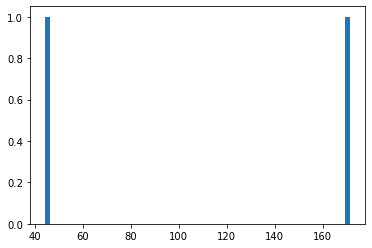

In [127]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[3]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [128]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[4]
]

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
CABO VERDE,CV,16.002082,-24.013197,0.59,2.0,1704,USG_11011,11011,MEXICO,QATAR,MEXICO,10.0
GHANA,GH,7.946527,-1.023194,33.48,686.0,68532,USG_11011,11011,MEXICO,QATAR,MEXICO,10.0
KENYA,KE,-0.023559,37.906193,54.03,772.0,101014,USG_11011,11011,MEXICO,QATAR,MEXICO,10.0
KUWAIT,KW,29.311660,47.481766,4.27,6766.0,105949,USG_11011,11011,MEXICO,QATAR,MEXICO,10.0
MALDIVES,MV,3.202778,73.220680,0.52,0.0,3743,USG_11011,11011,MEXICO,QATAR,MEXICO,10.0
MEXICO,MX,23.634501,-102.552784,127.50,6328.0,1073439,USG_11011,11011,MEXICO,QATAR,MEXICO,10.0
NIGER,NE,17.607789,8.081666,26.21,112.0,13741,USG_11011,11011,MEXICO,QATAR,MEXICO,10.0
QATAR,QA,25.354826,51.183884,2.70,9363.0,146401,USG_11011,11011,MEXICO,QATAR,MEXICO,10.0
SINGAPORE,SG,1.352083,103.819836,5.98,27.0,339988,USG_11011,11011,MEXICO,QATAR,MEXICO,10.0


(array([3., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  0.33  ,   2.4495,   4.569 ,   6.6885,   8.808 ,  10.9275,
         13.047 ,  15.1665,  17.286 ,  19.4055,  21.525 ,  23.6445,
         25.764 ,  27.8835,  30.003 ,  32.1225,  34.242 ,  36.3615,
         38.481 ,  40.6005,  42.72  ,  44.8395,  46.959 ,  49.0785,
         51.198 ,  53.3175,  55.437 ,  57.5565,  59.676 ,  61.7955,
         63.915 ,  66.0345,  68.154 ,  70.2735,  72.393 ,  74.5125,
         76.632 ,  78.7515,  80.871 ,  82.9905,  85.11  ,  87.2295,
         89.349 ,  91.4685,  93.588 ,  95.7075,  97.827 ,  99.9465,
        102.066 , 104.1855, 106.305 , 108.4245, 110.544 , 112.6635,
        114.783 , 116.9025, 119.022 , 121.1415, 123.261 , 125.3805,
        127.5   ]),
 <BarContainer object of 6

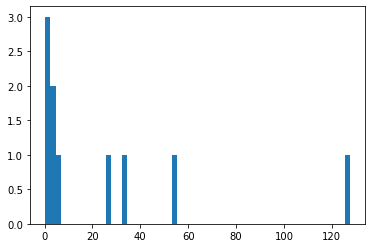

In [129]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[4]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [130]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[5]
]

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
BELARUS,BY,53.709807,27.953389,9.54,177.0,60259,USG_-1-1-1-1-1,-1-1-1-1-1,RUSSIAN FEDERATION,RUSSIAN FEDERATION,RUSSIAN FEDERATION,4.0
DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA,KP,40.339852,127.510093,26.07,606.0,15847,USG_-1-1-1-1-1,-1-1-1-1-1,RUSSIAN FEDERATION,RUSSIAN FEDERATION,RUSSIAN FEDERATION,4.0
RUSSIAN FEDERATION,RU,61.524010,105.318756,144.71,64239.0,1483498,USG_-1-1-1-1-1,-1-1-1-1-1,RUSSIAN FEDERATION,RUSSIAN FEDERATION,RUSSIAN FEDERATION,4.0
SYRIAN ARAB REPUBLIC,SY,34.802075,38.996815,22.13,186.0,15572,USG_-1-1-1-1-1,-1-1-1-1-1,RUSSIAN FEDERATION,RUSSIAN FEDERATION,RUSSIAN FEDERATION,4.0


(array([1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  9.54      ,  11.79283333,  14.04566667,  16.2985    ,
         18.55133333,  20.80416667,  23.057     ,  25.30983333,
         27.56266667,  29.8155    ,  32.06833333,  34.32116667,
         36.574     ,  38.82683333,  41.07966667,  43.3325    ,
         45.58533333,  47.83816667,  50.091     ,  52.34383333,
         54.59666667,  56.8495    ,  59.10233333,  61.35516667,
         63.608     ,  65.86083333,  68.11366667,  70.3665    ,
         72.61933333,  74.87216667,  77.125     ,  79.37783333,
         81.63066667,  83.8835    ,  86.13633333,  88.38916667,
         90.642     ,  92.89483333,  95.14766667,  97.4005    ,
         99.65333333, 101.90616667, 104.159     , 106.41183333,
        108.66466667, 

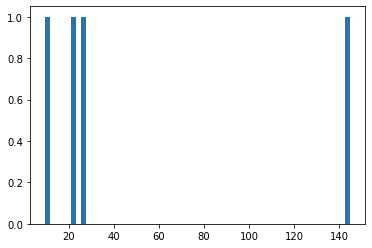

In [131]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[5]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)


(array([2., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  9.54 ,  23.057,  36.574,  50.091,  63.608,  77.125,  90.642,
        104.159, 117.676, 131.193, 144.71 ]),
 <BarContainer object of 10 artists>)

<Figure size 1440x720 with 0 Axes>

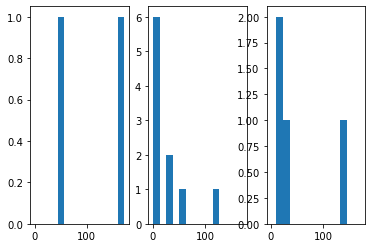

In [132]:
plt.figure(figsize=(20,10))


fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharex=True)
axs = [ax1,ax2,ax3]

axs[0].hist(
    country_attr_table_USG[
                country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[3]
            ]['Population mid-year estimates (millions), 2022']
)

axs[1].hist(
    country_attr_table_USG[
                country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[4]
            ]['Population mid-year estimates (millions), 2022']
)

axs[2].hist(
    country_attr_table_USG[
                country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[5]
            ]['Population mid-year estimates (millions), 2022']
)

In [133]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[6]
]

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
BOTSWANA,BW,-22.328474,24.684866,2.63,56.0,15782,USG_01001,01001,BOTSWANA,BRUNEI DARUSSALAM,BOTSWANA,2.0
BRUNEI DARUSSALAM,BN,4.535277,114.727669,0.45,637.0,12003,USG_01001,01001,BOTSWANA,BRUNEI DARUSSALAM,BOTSWANA,2.0


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.45      , 0.48633333, 0.52266667, 0.559     , 0.59533333,
        0.63166667, 0.668     , 0.70433333, 0.74066667, 0.777     ,
        0.81333333, 0.84966667, 0.886     , 0.92233333, 0.95866667,
        0.995     , 1.03133333, 1.06766667, 1.104     , 1.14033333,
        1.17666667, 1.213     , 1.24933333, 1.28566667, 1.322     ,
        1.35833333, 1.39466667, 1.431     , 1.46733333, 1.50366667,
        1.54      , 1.57633333, 1.61266667, 1.649     , 1.68533333,
        1.72166667, 1.758     , 1.79433333, 1.83066667, 1.867     ,
        1.90333333, 1.93966667, 1.976     , 2.01233333, 2.04866667,
        2.085     , 2.12133333, 2.15766667, 2.194     , 2.23033333,
        2.26666667, 2.303     , 2.33933333, 2.

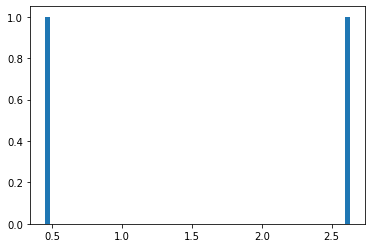

In [134]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[6]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [135]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[7]
]

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
ALGERIA,DZ,28.033886,1.659626,44.90,5954.0,147689,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
BOLIVIA (PLURINATIONAL STATE OF),BO,-16.290154,-63.588653,12.22,733.0,36573,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
BURUNDI,BI,-3.373056,29.918886,12.89,56.0,3399,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
CONGO,CG,-0.228021,15.827659,5.97,834.0,10100,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
KAZAKHSTAN,KZ,48.019573,66.923684,19.40,6984.0,171082,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
KYRGYZSTAN,KG,41.204380,74.766098,6.63,100.0,7736,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
LAO PEOPLE'S DEMOCRATIC REPUBLIC,LA,19.856270,102.495496,7.53,276.0,19082,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
TAJIKISTAN,TJ,38.861034,71.276093,9.95,170.0,7997,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
VIET NAM,VN,14.058324,108.277199,98.19,2776.0,271158,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0


(array([2., 1., 1., 0., 2., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 5.97 ,  7.507,  9.044, 10.581, 12.118, 13.655, 15.192, 16.729,
        18.266, 19.803, 21.34 , 22.877, 24.414, 25.951, 27.488, 29.025,
        30.562, 32.099, 33.636, 35.173, 36.71 , 38.247, 39.784, 41.321,
        42.858, 44.395, 45.932, 47.469, 49.006, 50.543, 52.08 , 53.617,
        55.154, 56.691, 58.228, 59.765, 61.302, 62.839, 64.376, 65.913,
        67.45 , 68.987, 70.524, 72.061, 73.598, 75.135, 76.672, 78.209,
        79.746, 81.283, 82.82 , 84.357, 85.894, 87.431, 88.968, 90.505,
        92.042, 93.579, 95.116, 96.653, 98.19 ]),
 <BarContainer object of 60 artists>)

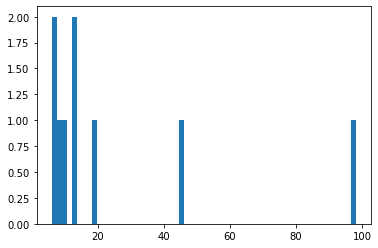

In [136]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[7]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [161]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[8]
]

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
BAHRAIN,BH,25.930414,50.637772,1.47,1045.0,33904,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0
BARBADOS,BB,13.193887,-59.543198,0.28,3.0,4440,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0
BELIZE,BZ,17.189877,-88.497650,0.41,7.0,1586,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0
BHUTAN,BT,27.514162,90.433601,0.78,85.0,2483,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0
BRAZIL,BR,-14.235004,-51.925280,215.31,12975.0,1444733,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0
CAMBODIA,KH,12.565679,104.990963,16.77,162.0,25291,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0
EGYPT,EG,26.820553,30.802498,110.99,3982.0,369309,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0
GAMBIA,GM,13.443182,-15.310139,2.71,7.0,1830,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0
GUYANA,GY,4.860416,-58.930180,0.81,4.0,5471,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0


(array([11.,  0.,  3.,  1.,  0.,  0.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([5.00000000e-02, 4.64083333e+00, 9.23166667e+00, 1.38225000e+01,
        1.84133333e+01, 2.30041667e+01, 2.75950000e+01, 3.21858333e+01,
        3.67766667e+01, 4.13675000e+01, 4.59583333e+01, 5.05491667e+01,
        5.51400000e+01, 5.97308333e+01, 6.43216667e+01, 6.89125000e+01,
        7.35033333e+01, 7.80941667e+01, 8.26850000e+01, 8.72758333e+01,
        9.18666667e+01, 9.64575000e+01, 1.01048333e+02, 1.05639167e+02,
        1.10230000e+02, 1.14820833e+02, 1.19411667e+02, 1.24002500e+02,
        1.28593333e+02, 1.33184167e+02, 1.37775000e+02, 1.42365833e+02,
        1.46956667e+02, 1.51547500e+02, 1.56138333e+02, 1.60729167e+02,
        1.

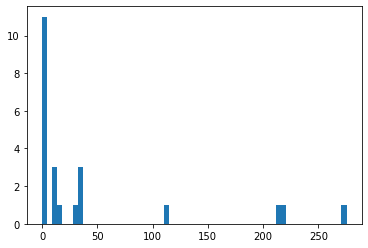

In [162]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[8]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [163]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[9]
]

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
INDIA,IN,20.593684,78.962880,1417.17,24030.0,2664749,USG_00000,00000,INDIA,INDIA,INDIA,9.0
MONGOLIA,MN,46.862496,103.846656,3.40,1409.0,13137,USG_00000,00000,INDIA,INDIA,INDIA,9.0
MOZAMBIQUE,MZ,-18.665695,35.529562,32.97,835.0,14029,USG_00000,00000,INDIA,INDIA,INDIA,9.0
NAMIBIA,NA_,-22.957640,18.490410,2.57,24.0,10710,USG_00000,00000,INDIA,INDIA,INDIA,9.0
PAKISTAN,PK,30.375321,69.345116,235.82,2366.0,257829,USG_00000,00000,INDIA,INDIA,INDIA,9.0
SOUTH AFRICA,ZA,-30.559482,22.937506,59.89,6712.0,302141,USG_00000,00000,INDIA,INDIA,INDIA,9.0
SRI LANKA,LK,7.873054,80.771797,21.83,178.0,80677,USG_00000,00000,INDIA,INDIA,INDIA,9.0
SUDAN,SD,12.862807,30.217636,46.87,408.0,62057,USG_00000,00000,INDIA,INDIA,INDIA,9.0
UGANDA,UG,1.373333,32.290275,47.25,889.0,38702,USG_00000,00000,INDIA,INDIA,INDIA,9.0


(array([3., 3., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([   2.57      ,   26.14666667,   49.72333333,   73.3       ,
          96.87666667,  120.45333333,  144.03      ,  167.60666667,
         191.18333333,  214.76      ,  238.33666667,  261.91333333,
         285.49      ,  309.06666667,  332.64333333,  356.22      ,
         379.79666667,  403.37333333,  426.95      ,  450.52666667,
         474.10333333,  497.68      ,  521.25666667,  544.83333333,
         568.41      ,  591.98666667,  615.56333333,  639.14      ,
         662.71666667,  686.29333333,  709.87      ,  733.44666667,
         757.02333333,  780.6       ,  804.17666667,  827.75333333,
         851.33      ,  874.90666667,  898.48333333,  922.06      ,
         945.63666667,  969.21333333,  992.79 

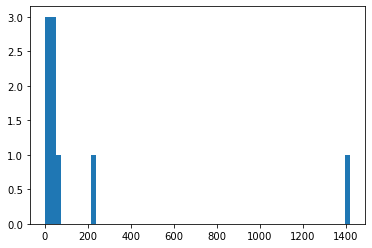

In [164]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[9]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [165]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[10]
]

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
LESOTHO,LS,-29.609988,28.233608,2.31,16.0,2273,USG_00011,00011,THAILAND,THAILAND,THAILAND,2.0
THAILAND,TH,15.870032,100.992541,71.70,3125.0,501795,USG_00011,00011,THAILAND,THAILAND,THAILAND,2.0


In [166]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[11]
]

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
ANTIGUA AND BARBUDA,AG,17.060816,-61.796428,0.09,0.0,1370,USG_01111,01111,HAITI,LIBYA,ISRAEL,11.0
GRENADA,GD,12.262776,-61.604171,0.13,0.0,1043,USG_01111,01111,HAITI,LIBYA,ISRAEL,11.0
HAITI,HT,18.971187,-72.285215,11.59,147.0,15505,USG_01111,01111,HAITI,LIBYA,ISRAEL,11.0
ISRAEL,IL,31.046051,34.851612,9.04,336.0,407101,USG_01111,01111,HAITI,LIBYA,ISRAEL,11.0
JAMAICA,JM,18.109581,-77.297508,2.83,8.0,13812,USG_01111,01111,HAITI,LIBYA,ISRAEL,11.0
LIBYA,LY,26.335100,17.228331,6.81,3187.0,29153,USG_01111,01111,HAITI,LIBYA,ISRAEL,11.0
MAURITIUS,MU,-20.348404,57.552152,1.30,10.0,10921,USG_01111,01111,HAITI,LIBYA,ISRAEL,11.0
SAINT LUCIA,LC,13.909444,-60.978893,0.18,1.0,1617,USG_01111,01111,HAITI,LIBYA,ISRAEL,11.0
SERBIA,RS,44.016521,21.005859,7.22,426.0,53335,USG_01111,01111,HAITI,LIBYA,ISRAEL,11.0


(array([3., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 0.09      ,  0.28166667,  0.47333333,  0.665     ,  0.85666667,
         1.04833333,  1.24      ,  1.43166667,  1.62333333,  1.815     ,
         2.00666667,  2.19833333,  2.39      ,  2.58166667,  2.77333333,
         2.965     ,  3.15666667,  3.34833333,  3.54      ,  3.73166667,
         3.92333333,  4.115     ,  4.30666667,  4.49833333,  4.69      ,
         4.88166667,  5.07333333,  5.265     ,  5.45666667,  5.64833333,
         5.84      ,  6.03166667,  6.22333333,  6.415     ,  6.60666667,
         6.79833333,  6.99      ,  7.18166667,  7.37333333,  7.565     ,
         7.75666667,  7.94833333,  8.14      ,  8.33166667,  8.52333333,
         8.715     ,  8.90666667,  9.09833333,  9.29      ,  9.481666

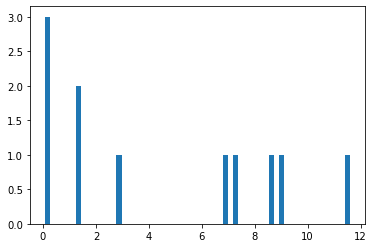

In [167]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[11]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [139]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[12]
]

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
CENTRAL AFRICAN REPUBLIC,CF,6.611111,20.939444,5.58,34.0,2323,USG_-10-100,-10-100,CHINA,CHINA,CHINA,5.0
CHINA,CN,35.861660,104.195397,1425.89,109745.0,14722801,USG_-10-100,-10-100,CHINA,CHINA,CHINA,5.0
CUBA,CU,21.521757,-77.781167,11.21,184.0,107352,USG_-10-100,-10-100,CHINA,CHINA,CHINA,5.0
MALI,ML,17.570692,-3.996166,22.59,162.0,17332,USG_-10-100,-10-100,CHINA,CHINA,CHINA,5.0
ZIMBABWE,ZW,-19.015438,29.154857,16.32,415.0,21787,USG_-10-100,-10-100,CHINA,CHINA,CHINA,5.0


(array([4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([   5.58      ,   29.25183333,   52.92366667,   76.5955    ,
         100.26733333,  123.93916667,  147.611     ,  171.28283333,
         194.95466667,  218.6265    ,  242.29833333,  265.97016667,
         289.642     ,  313.31383333,  336.98566667,  360.6575    ,
         384.32933333,  408.00116667,  431.673     ,  455.34483333,
         479.01666667,  502.6885    ,  526.36033333,  550.03216667,
         573.704     ,  597.37583333,  621.04766667,  644.7195    ,
         668.39133333,  692.06316667,  715.735     ,  739.40683333,
         763.07866667,  786.7505    ,  810.42233333,  834.09416667,
         857.766     ,  881.43783333,  905.10966667,  928.7815    ,
         952.45333333,  976.12516667,  999.797

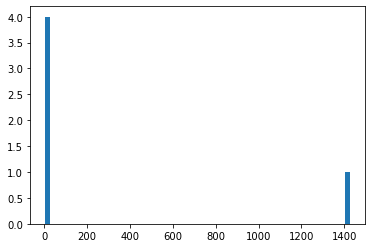

In [140]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[12]
    ]['Population mid-year estimates (millions), 2022'],
    bins = 60
)

In [141]:
country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'].isna()
]

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
AFGHANISTAN,AF,33.939110,67.709953,41.13,82.0,19793,NaN,NaN,NaN,NaN,NaN,NaN
ARMENIA,AM,40.069099,45.038189,2.78,38.0,12641,NaN,NaN,NaN,NaN,NaN,NaN
AZERBAIJAN,AZ,40.143105,47.576927,10.36,2475.0,42607,NaN,NaN,NaN,NaN,NaN,NaN
BAHAMAS,BS,25.034280,-77.396280,0.41,0.0,9908,NaN,NaN,NaN,NaN,NaN,NaN
BENIN,BJ,9.307690,2.315834,13.35,121.0,15205,NaN,NaN,NaN,NaN,NaN,NaN
BURKINA FASO,BF,12.238333,-1.561593,22.67,132.0,17369,NaN,NaN,NaN,NaN,NaN,NaN
CAMEROON,CM,7.369722,12.354722,27.91,544.0,39881,NaN,NaN,NaN,NaN,NaN,NaN
COMOROS,KM,-11.875001,43.872219,0.84,4.0,1235,NaN,NaN,NaN,NaN,NaN,NaN
DEMOCRATIC REPUBLIC OF THE CONGO,CD,-4.038333,21.758664,99.01,1285.0,45308,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
len(country_attr_table_USG[
    country_attr_table_USG['solidarity_group_1'].isna()
])

38

(array([15.,  7.,  5.,  2.,  2.,  1.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([7.000000e-02, 6.235500e+00, 1.240100e+01, 1.856650e+01,
        2.473200e+01, 3.089750e+01, 3.706300e+01, 4.322850e+01,
        4.939400e+01, 5.555950e+01, 6.172500e+01, 6.789050e+01,
        7.405600e+01, 8.022150e+01, 8.638700e+01, 9.255250e+01,
        9.871800e+01, 1.048835e+02, 1.110490e+02, 1.172145e+02,
        1.233800e+02]),
 <BarContainer object of 20 artists>)

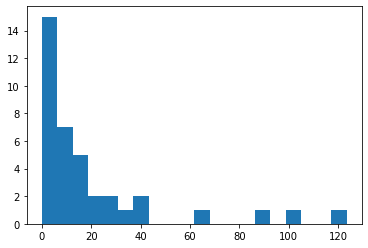

In [168]:
plt.hist(
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'].isna()
    ]['Population mid-year estimates (millions), 2022'], 
    bins= 20
)

# -----------------

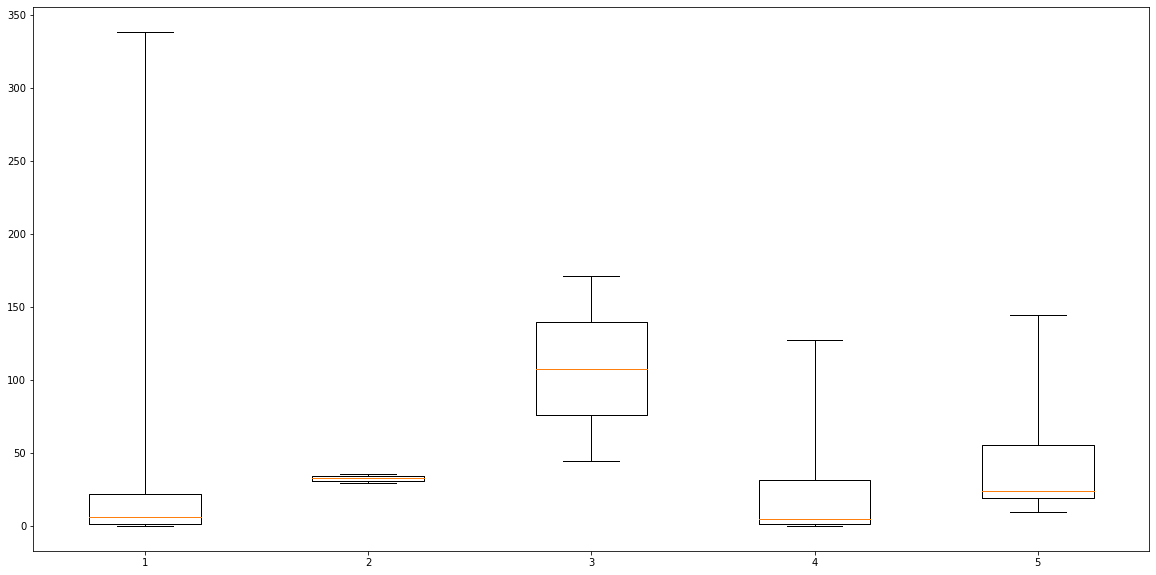

In [144]:
plt.figure(figsize=(20,10))


plt.boxplot([
    
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[1]
    ]['Population mid-year estimates (millions), 2022'], 
    
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[2]
    ]['Population mid-year estimates (millions), 2022'], 
    
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[3]
    ]['Population mid-year estimates (millions), 2022'],
    
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[4]
    ]['Population mid-year estimates (millions), 2022'],
    
    country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[5]
    ]['Population mid-year estimates (millions), 2022']  

], whis=[0,100]);

In [185]:
country_attr_table_USG[
        country_attr_table_USG['solidarity_group_1'] == list(set(country_attr_table_USG['solidarity_group_1']))[12]
    ]['Population mid-year estimates (millions), 2022']

Country
CENTRAL AFRICAN REPUBLIC       5.58
CHINA                       1425.89
CUBA                          11.21
MALI                          22.59
ZIMBABWE                      16.32
Name: Population mid-year estimates (millions), 2022, dtype: float64

In [146]:
#plt.hist?

#### Country with unique vote profile

In [183]:
vote_table_temp = vote_table[
                    [x in list(
                        country_attr_table_USG[
                            country_attr_table_USG['solidarity_group_1'].isna()
                        ].index
                    ) for x in vote_table['Country']]
                ]
vote_table_temp[
    vote_table_temp[list(vote_table_temp.columns)[1]].notna()
    &
    vote_table_temp[list(vote_table_temp.columns)[2]].notna()
    &
    vote_table_temp[list(vote_table_temp.columns)[3]].notna()
    &
    vote_table_temp[list(vote_table_temp.columns)[4]].notna()
    &
    vote_table_temp[list(vote_table_temp.columns)[5]].notna()
]

,Country,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
11,BAHAMAS,-1.0,1.0,1.0,1.0,1.0
55,ERITREA,-1.0,0.0,-1.0,-1.0,-1.0
62,GABON,0.0,1.0,-1.0,1.0,1.0
74,HONDURAS,0.0,0.0,1.0,1.0,1.0
123,NICARAGUA,-1.0,-1.0,-1.0,0.0,0.0
161,SOUTH SUDAN,0.0,0.0,0.0,1.0,0.0


In [186]:
vote_table_temp = vote_table[
                    [x in list(
                        country_attr_table_USG[
                            country_attr_table_USG['solidarity_group_1'].isna()
                        ].index
                    ) for x in vote_table['Country']]
                ]
vote_table_temp[
    vote_table_temp[list(vote_table_temp.columns)[1]].isna()
    &
    vote_table_temp[list(vote_table_temp.columns)[2]].isna()
    &
    vote_table_temp[list(vote_table_temp.columns)[3]].isna()
    &
    vote_table_temp[list(vote_table_temp.columns)[4]].isna()
    &
    vote_table_temp[list(vote_table_temp.columns)[5]].isna()
]

,Country,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
10,AZERBAIJAN,NaN,NaN,NaN,NaN,NaN
26,BURKINA FASO,NaN,NaN,NaN,NaN,NaN
176,TURKMENISTAN,NaN,NaN,NaN,NaN,NaN
188,VENEZUELA (BOLIVARIAN REPUBLIC OF),NaN,NaN,NaN,NaN,NaN


# -----------------------

In [149]:
country_attr_table_USG['GDP in current prices (millions of US dollars), 2020'].sum()

84116342

In [150]:
# Let's reset the index for our airbnb data

#country_attr_table_USG = country_attr_table_USG.reset_index()

# Now lets group by the cancellation policy and find the average review_scores_value by group
country_attr_table_USG.groupby(
    "solidarity_group_1", 
    dropna=False).agg(
        {
            "Population mid-year estimates (millions), 2022":np.sum,
            "Primary energy production (petajoules), 2019":np.sum,
            "GDP in current prices (millions of US dollars), 2020":np.sum
        }
    )

,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020"
solidarity_group_1,,,
USG_-1-1-1-1-1,202.45,65208.0,1575176
USG_-10-100,1481.59,110540.0,14871595
USG_00-100,217.68,17883.0,674816
USG_00000,1867.77,36851.0,3444031
USG_00011,74.01,3141.0,504068
USG_01000,65.20,3957.0,75315
USG_01001,3.08,693.0,27785
USG_01010,215.69,11869.0,496241
USG_01011,1018.14,97295.0,5007591


<AxesSubplot:xlabel='solidarity_group_1'>

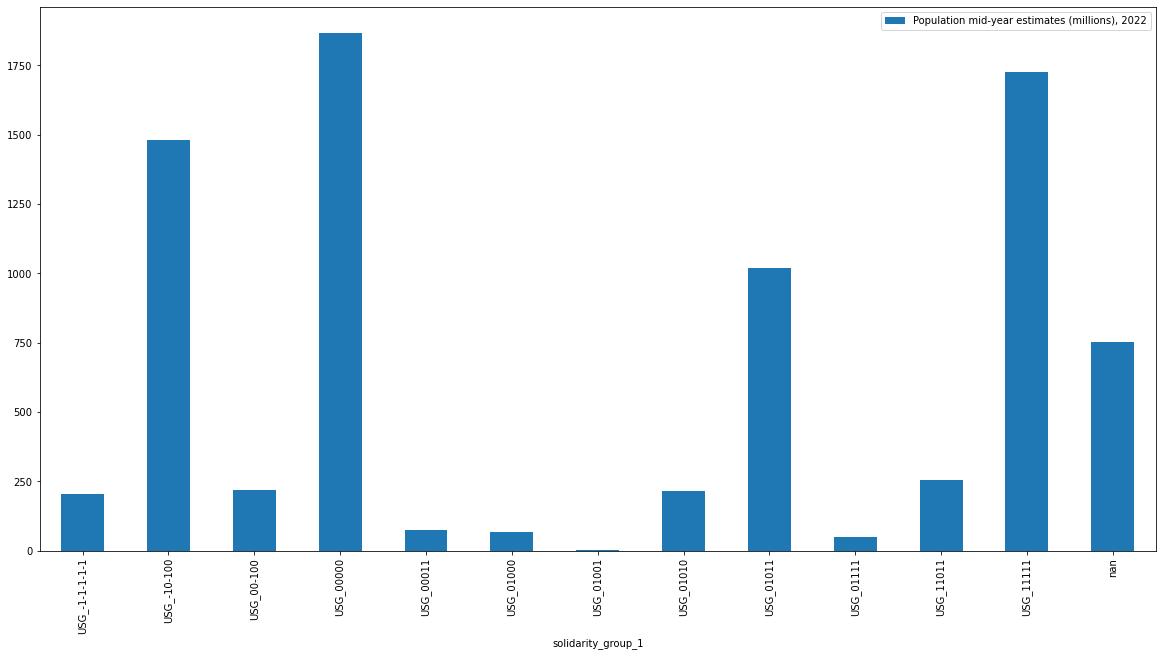

In [151]:
country_attr_table_USG.groupby(
    "solidarity_group_1", 
    dropna=False).agg(
        {
            "Population mid-year estimates (millions), 2022":np.sum,
            "Primary energy production (petajoules), 2019":np.sum,
            "GDP in current prices (millions of US dollars), 2020":np.sum
        }
    ).plot(
            kind='bar',
            y=[
                'Population mid-year estimates (millions), 2022',
                #'Primary energy production (petajoules), 2019',
                #'GDP in current prices (millions of US dollars), 2020'
            ], 
            figsize=(20,10)
        )

In [152]:
country_attr_table_USG[country_attr_table_USG['solidarity_group_1'] == 'USG_00-100']

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
ALGERIA,DZ,28.033886,1.659626,44.90,5954.0,147689,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
BOLIVIA (PLURINATIONAL STATE OF),BO,-16.290154,-63.588653,12.22,733.0,36573,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
BURUNDI,BI,-3.373056,29.918886,12.89,56.0,3399,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
CONGO,CG,-0.228021,15.827659,5.97,834.0,10100,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
KAZAKHSTAN,KZ,48.019573,66.923684,19.40,6984.0,171082,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
KYRGYZSTAN,KG,41.204380,74.766098,6.63,100.0,7736,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
LAO PEOPLE'S DEMOCRATIC REPUBLIC,LA,19.856270,102.495496,7.53,276.0,19082,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
TAJIKISTAN,TJ,38.861034,71.276093,9.95,170.0,7997,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0
VIET NAM,VN,14.058324,108.277199,98.19,2776.0,271158,USG_00-100,00-100,VIET NAM,KAZAKHSTAN,VIET NAM,9.0


In [153]:
country_attr_table_USG[country_attr_table_USG['solidarity_group_1'] == 'USG_00000']

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
INDIA,IN,20.593684,78.962880,1417.17,24030.0,2664749,USG_00000,00000,INDIA,INDIA,INDIA,9.0
MONGOLIA,MN,46.862496,103.846656,3.40,1409.0,13137,USG_00000,00000,INDIA,INDIA,INDIA,9.0
MOZAMBIQUE,MZ,-18.665695,35.529562,32.97,835.0,14029,USG_00000,00000,INDIA,INDIA,INDIA,9.0
NAMIBIA,NA_,-22.957640,18.490410,2.57,24.0,10710,USG_00000,00000,INDIA,INDIA,INDIA,9.0
PAKISTAN,PK,30.375321,69.345116,235.82,2366.0,257829,USG_00000,00000,INDIA,INDIA,INDIA,9.0
SOUTH AFRICA,ZA,-30.559482,22.937506,59.89,6712.0,302141,USG_00000,00000,INDIA,INDIA,INDIA,9.0
SRI LANKA,LK,7.873054,80.771797,21.83,178.0,80677,USG_00000,00000,INDIA,INDIA,INDIA,9.0
SUDAN,SD,12.862807,30.217636,46.87,408.0,62057,USG_00000,00000,INDIA,INDIA,INDIA,9.0
UGANDA,UG,1.373333,32.290275,47.25,889.0,38702,USG_00000,00000,INDIA,INDIA,INDIA,9.0


<AxesSubplot:xlabel='solidarity_group_1'>

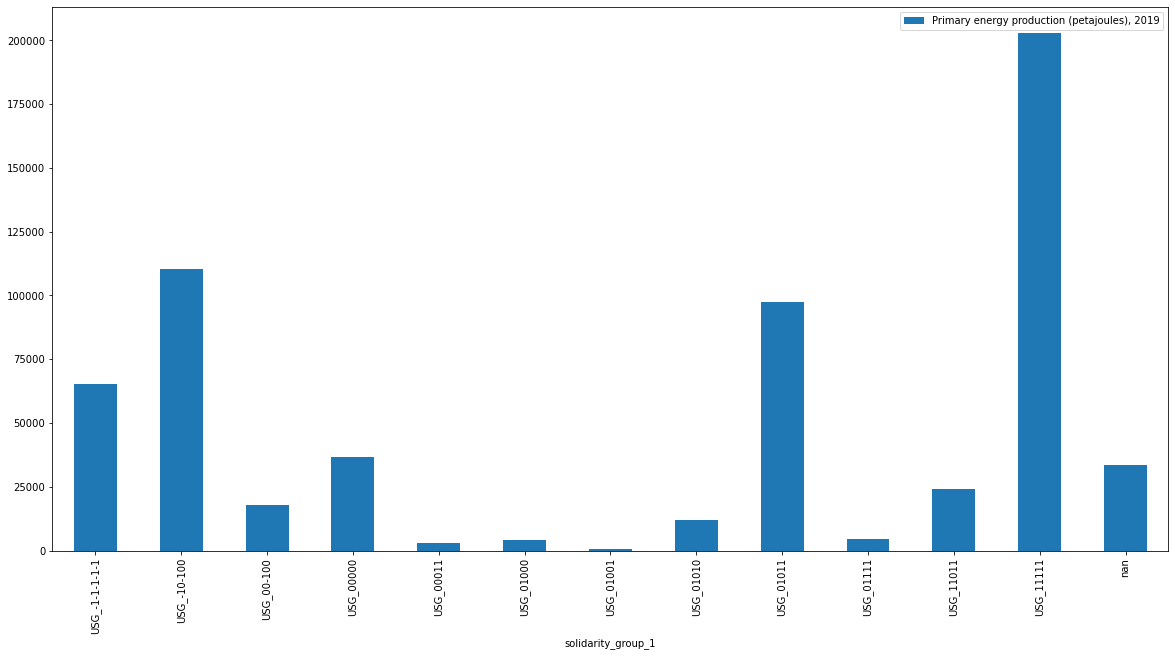

In [154]:
country_attr_table_USG.groupby(
    "solidarity_group_1", 
    dropna=False).agg(
        {
            "Population mid-year estimates (millions), 2022":np.sum,
            "Primary energy production (petajoules), 2019":np.sum,
            "GDP in current prices (millions of US dollars), 2020":np.sum
        }
    ).plot(
            kind='bar',
            y=[
                #'Population mid-year estimates (millions), 2022',
                'Primary energy production (petajoules), 2019',
                #'GDP in current prices (millions of US dollars), 2020'
            ], 
            figsize=(20,10)
        )

In [155]:
country_attr_table_USG[country_attr_table_USG['solidarity_group_1'] == 'USG_01011']

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
BAHRAIN,BH,25.930414,50.637772,1.47,1045.0,33904,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0
BARBADOS,BB,13.193887,-59.543198,0.28,3.0,4440,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0
BELIZE,BZ,17.189877,-88.497650,0.41,7.0,1586,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0
BHUTAN,BT,27.514162,90.433601,0.78,85.0,2483,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0
BRAZIL,BR,-14.235004,-51.925280,215.31,12975.0,1444733,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0
CAMBODIA,KH,12.565679,104.990963,16.77,162.0,25291,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0
EGYPT,EG,26.820553,30.802498,110.99,3982.0,369309,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0
GAMBIA,GM,13.443182,-15.310139,2.71,7.0,1830,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0
GUYANA,GY,4.860416,-58.930180,0.81,4.0,5471,USG_01011,01011,INDONESIA,SAUDI ARABIA,BRAZIL,23.0


<AxesSubplot:xlabel='solidarity_group_1'>

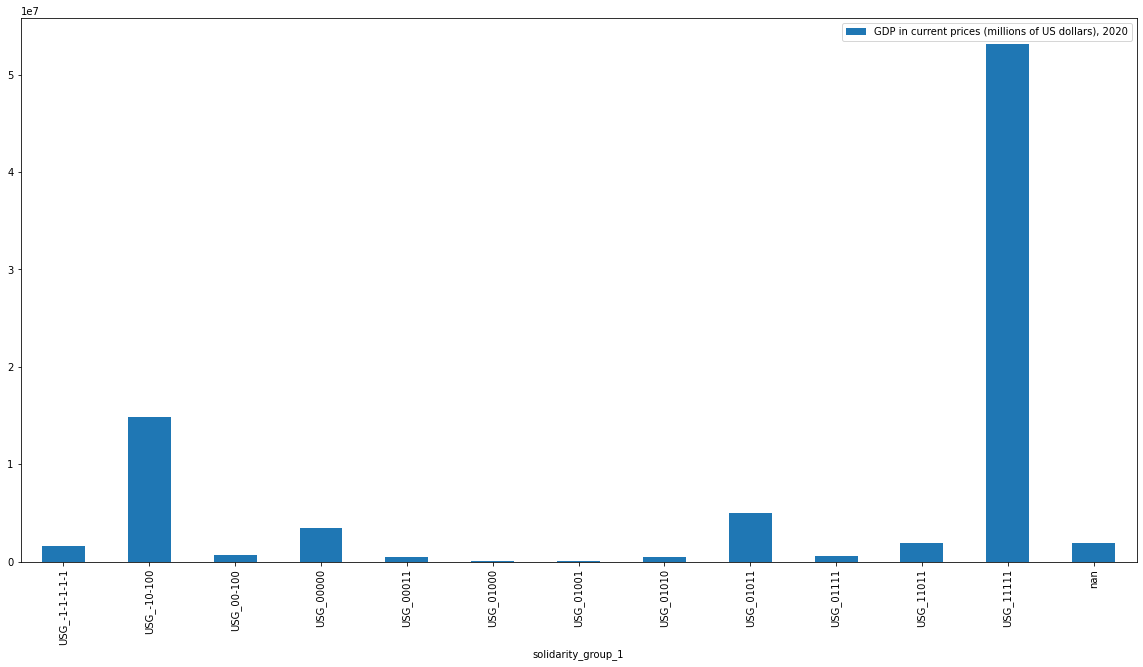

In [156]:
country_attr_table_USG.groupby(
    "solidarity_group_1", 
    dropna=False).agg(
        {
            "Population mid-year estimates (millions), 2022":np.sum,
            "Primary energy production (petajoules), 2019":np.sum,
            "GDP in current prices (millions of US dollars), 2020":np.sum
        }
    ).plot(
            kind='bar',
            y=[
                #'Population mid-year estimates (millions), 2022',
                #'Primary energy production (petajoules), 2019',
                'GDP in current prices (millions of US dollars), 2020'
            ], 
            figsize=(20,10)
        )

<AxesSubplot:xlabel='solidarity_group_1'>

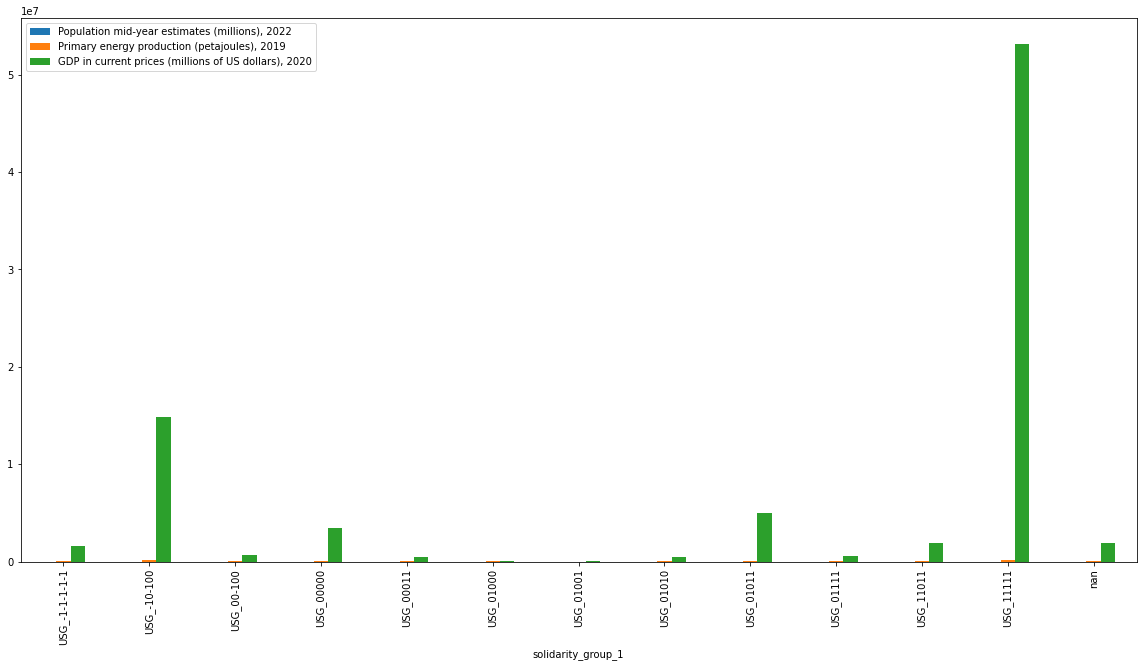

In [157]:
country_attr_table_USG.groupby(
    "solidarity_group_1", 
    dropna=False).agg(
        {
            "Population mid-year estimates (millions), 2022":np.sum,
            "Primary energy production (petajoules), 2019":np.sum,
            "GDP in current prices (millions of US dollars), 2020":np.sum
        }
    ).plot(
            kind='bar',
            y=[
                'Population mid-year estimates (millions), 2022',
                'Primary energy production (petajoules), 2019',
                'GDP in current prices (millions of US dollars), 2020'
            ], 
            figsize=(20,10)
        )

In [158]:
country_attr_table_USG[country_attr_table_USG['solidarity_group_1'] == 'USG_00000']

,Country index,latitude,longitude,"Population mid-year estimates (millions), 2022","Primary energy production (petajoules), 2019","GDP in current prices (millions of US dollars), 2020",solidarity_group_1,votes profile,main country (by population),main country (by energy),main country (by GDP),number of members
Country,,,,,,,,,,,,
INDIA,IN,20.593684,78.962880,1417.17,24030.0,2664749,USG_00000,00000,INDIA,INDIA,INDIA,9.0
MONGOLIA,MN,46.862496,103.846656,3.40,1409.0,13137,USG_00000,00000,INDIA,INDIA,INDIA,9.0
MOZAMBIQUE,MZ,-18.665695,35.529562,32.97,835.0,14029,USG_00000,00000,INDIA,INDIA,INDIA,9.0
NAMIBIA,NA_,-22.957640,18.490410,2.57,24.0,10710,USG_00000,00000,INDIA,INDIA,INDIA,9.0
PAKISTAN,PK,30.375321,69.345116,235.82,2366.0,257829,USG_00000,00000,INDIA,INDIA,INDIA,9.0
SOUTH AFRICA,ZA,-30.559482,22.937506,59.89,6712.0,302141,USG_00000,00000,INDIA,INDIA,INDIA,9.0
SRI LANKA,LK,7.873054,80.771797,21.83,178.0,80677,USG_00000,00000,INDIA,INDIA,INDIA,9.0
SUDAN,SD,12.862807,30.217636,46.87,408.0,62057,USG_00000,00000,INDIA,INDIA,INDIA,9.0
UGANDA,UG,1.373333,32.290275,47.25,889.0,38702,USG_00000,00000,INDIA,INDIA,INDIA,9.0
